In [1]:
#%matplotlib notebook

import numpy
import skimage
import skimage.io
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt


## pour afficher une seule image
def imview(image, cmap="gray"):
    plt.figure(figsize=(4,4))
    plt.imshow(image,cmap=cmap)
    plt.show()
    
## pour afficher plusieurs images l'une à côté de l'autre
def viewlist(images,cmap="gray"):
    plt.figure(figsize=(12,4))
    columns = len(images)
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,cmap=cmap)
    plt.show()

In [2]:
## Telechargement des images

import sys

url="http://perso.esiee.fr/~talboth/ISBS/TP/isbs_images.tar.gz"
filename="isbs_images.tar.gz"
if (sys.version_info.major < 3):
    ## python2 syntax
    import urllib2
    response = urllib2.urlopen(url, timeout = 5)
    content = response.read()
    f = open( filename, 'w' )
    f.write( content )
    f.close()
else:
    ## python3 syntax
    import urllib.request
    # Download the file from `url` and save it locally under `file_name`:
    with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
        data = response.read() # a `bytes` object
        out_file.write(data)
    
!ls -l

## ouverture de l'archive
!tar xvf isbs_images.tar.gz

total 151632
-rw-r--r--@   1 elo  staff     90746 27 mar  2023 Cosmos_original.jpg
-rw-r--r--@   1 elo  staff    103998 28 avr  2020 Exercices_imagerie.ipynb
drwxr-xr-x@ 100 elo  staff      3200 31 mar  2023 Images
-rw-r--r--    1 elo  staff    807697 16 jui  2023 Introduction_Morphologie_Mathematique.ipynb
-rw-r--r--@   1 elo  staff   1269851 28 avr  2020 MASI.ipynb
-rw-r--r--    1 elo  staff     10066 26 jan  2023 TIFO_morpho_1.aux
-rw-r--r--    1 elo  staff    140592 26 jan  2023 TIFO_morpho_1.log
-rw-r--r--    1 elo  staff      3451 26 jan  2023 TIFO_morpho_1.nav
-rw-r--r--    1 elo  staff       165 26 jan  2023 TIFO_morpho_1.out
-rw-r--r--@   1 elo  staff   3150966 26 jan  2023 TIFO_morpho_1.pdf
-rw-r--r--    1 elo  staff         0 26 jan  2023 TIFO_morpho_1.snm
-rw-r--r--    1 elo  staff     94255 26 jan  2023 TIFO_morpho_1.synctex.gz
-rwxr-xr-x@   1 elo  staff     36506 26 jan  2023 TIFO_morpho_1.tex
-rw-r--r--    1 elo  staff     36506 31 jan  2023 TIFO_morpho_1.tex.bak
-rw-r--

x Images/
x Images/cell.pgm
x Images/bees/
x Images/tp4/
x Images/tp3/
x Images/tp2/
x Images/code/
x Images/bloodcells.pgm
x Images/projet/
x Images/muscle.pgm
x Images/tp1/
x Images/numbers.pgm
x Images/tp1/meb.pgm
x Images/tp1/cells.pgm
x Images/tp1/circuit.pgm
x Images/projet/vide512.pgm
x Images/projet/poils512.pgm
x Images/projet/acne512.pgm
x Images/code/Nastynumbers.ipynb
x Images/tp2/axoneme.pgm
x Images/tp2/uraniumoxyde.pgm
x Images/tp2/axoneme.tif
x Images/tp3/cell.pgm
x Images/tp3/bloodcells.pgm
x Images/tp3/muscle.pgm
x Images/tp3/numbers.pgm
x Images/tp4/cell.pgm
x Images/tp4/bloodcells.pgm
x Images/tp4/muscle.pgm
x Images/tp4/fondoeil.pgm
x Images/tp4/numbers.pgm
x Images/bees/Bee1.pgm


In [5]:
def magicmorpho(image):
    return image - skimage.morphology.opening(image, skimage.morphology.disk(3))

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Premier exemple : des nombres sur un fond inhomogène

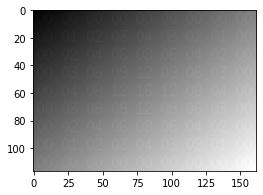

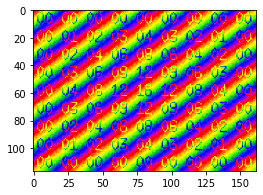

In [7]:
nombres=skimage.io.imread("Images/numbers.pgm")
imview(nombres)
## Les nombrs sont très peu visibles, vous pouvez essayer la colormap "prism" pour peut-être mieux les voir
imview(nombres,"prism")

In [8]:
def seuil(x):
    return imview(nombres>x)
interact(seuil, x=100, image=nombres);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

Clairement, un seuil ça marche pas des masses ici...
C'est le moment de faire appel à la magie de la morphologie mathématique !

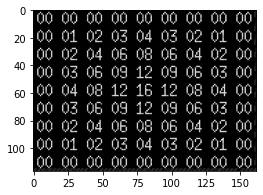

In [9]:
# petite fonction codée par mes soins...
image_nombres = magicmorpho(nombres)
imview(image_nombres)

<img src="https://media.giphy.com/media/nUIHbvOxGnKiA/giphy.gif" width="500">

Ce n'est pas de la magie, c'est de la morphologie mathématique !

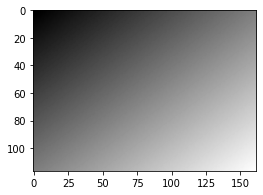

In [10]:
nombres_erodes = skimage.morphology.erosion(nombres, skimage.morphology.disk(3))
imview(nombres_erodes)

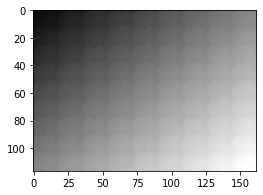

In [8]:
nombres_dilat = skimage.morphology.dilation(nombres, skimage.morphology.disk(3))
imview(nombres_dilat)


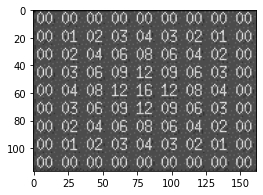

In [9]:
imview(nombres-nombres_erodes)
plt.imsave( "pas_propre.png", nombres-nombres_erodes)

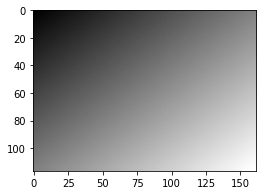

In [10]:
nombres_ouv = skimage.morphology.opening(nombres, skimage.morphology.disk(3))
imview(nombres_ouv)

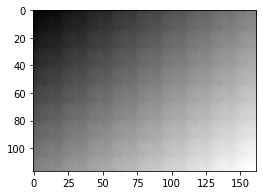

In [11]:
nombres_ferme = skimage.morphology.closing(nombres, skimage.morphology.disk(3))
imview(nombres_ferme)

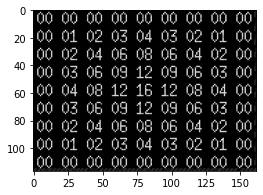

In [12]:
imview(nombres-nombres_ouv)
plt.imsave( "propre.png", nombres-nombres_ouv)

### Explications :
Le soucis dans l'image de départ est que le fond est inhomogène. Ce que l'on cherche à faire, c'est récupérer les chiffres. "Récupérer les chiffres" peut aussi se voir comme "éliminer le fond", qui est en fait plus simple. La première étape est donc d'enlever ce fond.
#### Enlever le fond
Enlever le fond signifie en fait 1) le récupérer et 2) le soustraire à l'image d'origine. 
Pour récupérer le fond, il "suffit" d'effacer les chiffres.
Les chiffres sont plus clairs que le fond : pour les enlever, il faut donc faire une erosion $\epsilon$ ou une ouverture $\gamma$ par un élément structurant $\mathcal{S}_r$.
On préfèrera la fermeture car plus "propre" comme illustré ci dessous.

<img src="pas_propre.png" width="400"> | <img src="propre.png" width="400">
:---: | :---:
$\uparrow$ | $\uparrow$
$I-\epsilon(I)_{\mathcal{S}_r}$ | $I-\gamma(I)_{\mathcal{S}_r}$
|

#### Des filtres morphologiques bien connus
L'opération $I-\gamma(I)_{\mathcal{S}_r}$ est un filtre morphologique bien connu : il s'agit du "white top-hat".


On peut définir le "black top-hat" comme $\varphi(I)_{\mathcal{S}_r}-I$ 

#### A retenir :
- récupérer de petits éléments blancs = white top-hat = image - ouverture de l'image
- récupérer de petits éléments noirs = black top-hat = fermeture de l'image - image




## Deuxième exemple : 

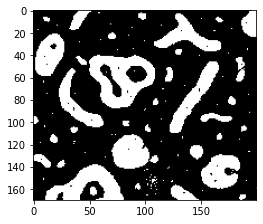

In [11]:
cellules = skimage.io.imread("Images/tp1/cells.pgm")
imview(cellules)

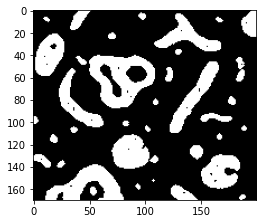

In [12]:
### Enlever le bruit "sel et poivre"
img_sans_sel = skimage.morphology.opening(cellules, skimage.morphology.disk(1))
imview(img_sans_sel)

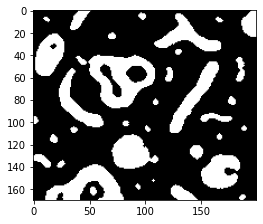

In [13]:
### Enlever le bruit "sel et poivre"
img_sans_poivre = skimage.morphology.closing(img_sans_sel, skimage.morphology.disk(1))
imview(img_sans_poivre)

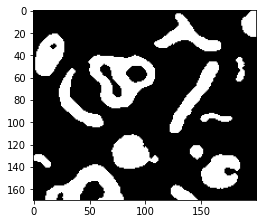

In [14]:
### enlever les petits artefacts
img_clean = skimage.morphology.remove_small_objects(skimage.morphology.label(img_sans_poivre.astype('uint8')), 100, 4)
imview(img_clean>1)

In [15]:
skimage.morphology.remove_small_objects?